In [1]:
pip install -U scikit-learn


     |████████████████████████████████| 9.0 MB 1.4 MB/s eta 0:00:01     |████████████▉                   | 3.6 MB 1.3 MB/s eta 0:00:05
     |████████████████████████████████| 297 kB 5.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#importing Model libraries
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.feature_selection import RFE


### OPENFACE AVERAGE

In [3]:
#read the final csv
folder_path = "/Users/shreya/606 Capstone/VideoChunks_1 /OpenFace_Final/Final.csv"
video = pd.read_csv(folder_path)
video

,VideoName,mean_AU01,mean_AU02,mean_AU04,mean_AU05,mean_AU06,mean_AU07,mean_AU09,mean_AU10,mean_AU11,...,mean_AU28,mean_AU43,mean_anger,mean_disgust,mean_fear,mean_happiness,mean_sadness,mean_surprise,mean_neutral,Label
0,trial_lie_001_000,0.559135,0.513050,0.254950,0.413367,0.131757,0.119048,0.210417,0.106673,0.479506,...,0.137724,0.144841,0.034503,0.004511,0.018815,0.346850,0.249029,0.265825,0.080468,lie
1,trial_lie_001_001,0.546610,0.482385,0.292549,0.393281,0.123315,0.076923,0.182163,0.044325,0.473213,...,0.103712,0.110869,0.027199,0.006233,0.015653,0.453637,0.151641,0.245443,0.100194,lie
2,trial_lie_001_002,0.560753,0.483092,0.291333,0.393530,0.129316,0.094017,0.184086,0.036360,0.473673,...,0.111731,0.127748,0.028358,0.007122,0.016593,0.468327,0.091021,0.293954,0.094625,lie
3,trial_lie_001_003,0.532220,0.481838,0.321986,0.388174,0.154953,0.126984,0.256083,0.150329,0.478114,...,0.153399,0.227434,0.024174,0.002683,0.013205,0.099999,0.258340,0.403113,0.198486,lie
4,trial_lie_002_000,0.436142,0.412403,0.371331,0.332483,0.242381,0.111111,0.288108,0.081820,0.473882,...,0.086161,0.207142,0.120490,0.027522,0.039825,0.132332,0.517453,0.074959,0.087419,lie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,trial_truth_060_000,0.496345,0.485515,0.535118,0.406868,0.251973,0.246032,0.375586,0.317093,0.470617,...,0.061832,0.483794,0.317662,0.047535,0.087699,0.050396,0.224306,0.103952,0.168450,truth
733,trial_truth_060_001,0.422170,0.468637,0.446201,0.508495,0.177772,0.228070,0.292094,0.330395,0.467192,...,0.041104,0.088334,0.256627,0.011986,0.083970,0.062653,0.051118,0.459040,0.074607,truth
734,trial_truth_060_002,0.515533,0.491938,0.438462,0.551434,0.202776,0.139344,0.341805,0.180777,0.470024,...,0.059043,0.132496,0.111543,0.005858,0.142710,0.088277,0.061379,0.563947,0.026286,truth
735,trial_truth_060_003,0.469542,0.475879,0.492550,0.457961,0.187666,0.245763,0.367703,0.170327,0.469233,...,0.063372,0.142941,0.245029,0.015846,0.144640,0.164392,0.021705,0.363823,0.044565,truth


In [4]:
#check for and delete null values
video.dropna()
video = video.drop('VideoName', axis=1)

In [5]:
#splitting the data
lie = video.loc[video['Label'] == 'lie']
truth = video.loc[video['Label'] == 'truth']

In [6]:
# Split the data into features (X) and target (y)
lie_X = lie.drop('Label', axis=1)
lie_y = lie['Label'].map({'lie':1,'truth':0})
truth_X = truth.drop('Label', axis=1)
truth_y = truth['Label'].map({'lie':1,'truth':0})

lieX_train, lieX_test, liey_train, liey_test = train_test_split(lie_X, lie_y, test_size=0.2)
truthX_train, truthX_test, truthy_train, truthy_test = train_test_split(truth_X, truth_y, test_size=0.2)

framesX_train = [lieX_train, truthX_train]
framesX_test = [lieX_test, truthX_test]
framesy_train = [liey_train, truthy_train]
framesy_test = [liey_test, truthy_test]

X_train = pd.concat(framesX_train)
X_test = pd.concat(framesX_test)
y_train = pd.concat(framesy_train)
y_test = pd.concat(framesy_test)

In [7]:
# Create an SVM object
svm = SVC(kernel='linear')


In [8]:
# Fit the SVM model to the training data
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [9]:
# Predict the classes of the test data
y_pred = svm.predict(X_test)

In [10]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7027027027027027


In [11]:
#get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[50, 20],
       [24, 54]])

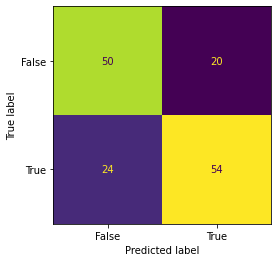

In [12]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot(colorbar=False)
plt.show()

In [18]:
#precision and recall factor
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7464788732394366
Recall: 0.6794871794871795


#### HYPER PARAMETER TUNING 

In [13]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create SVM estimator object
svm = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [14]:
# Create variables for best model and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters found
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [17]:
# Initialize the SVM with the chosen hyperparameters
svm_hyp=SVC(C=10, gamma=10, kernel='rbf')

# Train the SVM on the training data
svm_hyp.fit(X_train, y_train)

# Evaluate the performance of the SVM on the testing data
score = svm_hyp.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", score)

Accuracy: 0.8648648648648649


In [21]:
#precision and recall factor
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7297297297297297
Recall: 0.6923076923076923


first load the dataset and split it into input features X and target variable y. We then create an SVM model with linear kernel and use RFE to select the top 5 features. We obtain the feature ranking using rfe.ranking_, which assigns a rank to each feature based on its importance. Finally, we plot the feature ranking using a bar chart with Plotly Express.

In [ ]:
# Create an SVM model with linear kernel
model = SVC(kernel='linear')

# Select the top 5 features using RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the feature ranking
feature_ranking = pd.Series(rfe.ranking_, index=X_train.columns)

# Plot a bar chart of the feature ranking
fig = px.bar(feature_ranking,
             color=feature_ranking.values,
             labels={'index':'Feature Name','value':'Ranking'},
             height=400,
             title="Feature Ranking",
             color_continuous_scale='Blugrn')
fig.show()

In [ ]:
!pip install py-feat


Found existing installation: py-feat 0.5.1
Uninstalling py-feat-0.5.1:
  Would remove:
    /Users/shreya/opt/anaconda3/lib/python3.8/site-packages/feat/*
    /Users/shreya/opt/anaconda3/lib/python3.8/site-packages/py_feat-0.5.1.dist-info/*
Proceed (y/n)? 

### OPENFACE INDIVIDUAL FILES

In [45]:
#read the train and test csv files
train_path = "/Users/shreya/606 Capstone/train_DARE_3.csv"
train_file = pd.read_csv(train_path)
test_path = "/Users/shreya/606 Capstone/test_DARE_3.csv"
test_file = pd.read_csv(test_path)

train_file["video_name"] = train_file["video_name"].str[:-4]
test_file["video_name"] = test_file["video_name"].str[:-4]

In [46]:
train_path = "/Users/shreya/606 Capstone/train_DARE_3.csv"
train_file = pd.read_csv(train_path)
train_file


,video_name,video_path,duration_in_seconds,FPS,total_frame_count,label,video_root_name
0,trial_lie_039_006.mp4,./data/Video_chunks/Video_chunks\trial_lie_039...,4.02,27.00000,108.540000,lie,trial_lie_039
1,trial_truth_004_009.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,4.21,29.97003,126.173826,truth,trial_truth_004
2,trial_lie_052_002.mp4,./data/Video_chunks/Video_chunks\trial_lie_052...,3.90,30.00000,117.000000,lie,trial_lie_052
3,trial_truth_039_003.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,3.96,25.00000,99.000000,truth,trial_truth_039
4,trial_truth_045_005.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,4.51,10.00000,45.100000,truth,trial_truth_045
...,...,...,...,...,...,...,...
515,trial_truth_005_002.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,3.90,29.97003,116.883117,truth,trial_truth_005
516,trial_truth_015_004.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,3.90,29.97003,116.883117,truth,trial_truth_015
517,trial_truth_018_001.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,3.08,25.00000,77.000000,truth,trial_truth_018
518,trial_truth_042_001.mp4,./data/Video_chunks/Video_chunks\trial_truth_0...,3.60,10.00000,36.000000,truth,trial_truth_042


In [52]:
#create an array of the training file names with path
# Create an empty list to store the file names with path
train_file_names_1 = []

# Define the path to the directory containing the training files
train_dir_path = "/Users/shreya/606 Capstone/OpenFace 2/"

# Loop through each file in the directory and append the file name with path to the list
for filename in test_file["video_name"]:
    path = filepath + filename + ".csv"
    if(os.path.exists(path)):
        train_file_names_1.append(path)
print(path)
# Print the list of file names with path
print(train_file_names_1)

/Users/shreya/606 Capstone/OpenFace 2/trial_lie_008_001.csv
['/Users/shreya/606 Capstone/OpenFace 2/trial_lie_030_000.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_011_000.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_006_004.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_059_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_031_004.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_024_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_015_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_048_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_011_005.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_004_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_013_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_053_005.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_050_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_022_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_tr

In [53]:
#create an array of the testing file names with path
test_file_contents = []
filepath = "/Users/shreya/606 Capstone/OpenFace 2/"
for filename in test_file["video_name"]:
    path = filepath + filename + ".csv"
    if(os.path.exists(path)):
        test_file_contents.append(path)

In [51]:
print(test_file_contents)

['/Users/shreya/606 Capstone/OpenFace 2/trial_lie_030_000.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_011_000.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_006_004.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_059_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_031_004.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_024_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_015_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_048_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_011_005.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_004_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_013_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_053_005.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_lie_050_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_022_003.csv', '/Users/shreya/606 Capstone/OpenFace 2/trial_truth_057_001.csv', '/Users/shreya/606 Capstone/OpenFace 2/tri

In [55]:
#Aggregate the files using a Fex dataframe
from feat.utils.io import read_feat

fex_train = pd.concat(map(lambda excel: read_feat(excel), train_file_names_1))
fex_test = pd.concat(map(lambda excel: read_feat(excel), test_file_contents))

#drop null values
fex_train = fex_train.dropna()
fex_test = fex_test.dropna()

#add label column
fex_train.loc[fex_train['input'].str.contains('lie'), 'Label'] = 1
fex_train.loc[fex_train['input'].str.contains('truth'), 'Label'] = 0
fex_train['Label'] = fex_train['Label'].astype(int)

fex_test.loc[fex_test['input'].str.contains('lie'), 'Label'] = 1
fex_test.loc[fex_test['input'].str.contains('truth'), 'Label'] = 0
fex_test['Label'] = fex_test['Label'].astype(int)

In [56]:
X_train = fex_train.loc[:, ['AU01','AU02','AU04','AU05','AU06','AU07','AU09','AU10','AU11','AU12','AU14','AU15','AU17','AU20','AU23','AU24','AU25','AU26','AU28','AU43','anger','disgust','fear','happiness','sadness','surprise','neutral']]
y_train = fex_train["Label"]
X_test = fex_test.loc[:, ['AU01','AU02','AU04','AU05','AU06','AU07','AU09','AU10','AU11','AU12','AU14','AU15','AU17','AU20','AU23','AU24','AU25','AU26','AU28','AU43','anger','disgust','fear','happiness','sadness','surprise','neutral']]
y_test = fex_test["Label"]

In [63]:
svm_classifier = SVC(kernel='linear')


In [64]:
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [65]:
y_pred = svm_classifier.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6843076639136253


In [14]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[ 4563,  3981],
       [ 2861, 10268]])

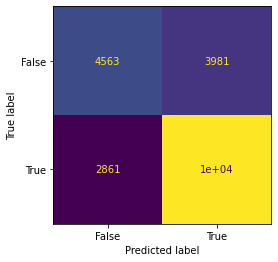

In [15]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot(colorbar=False)
plt.show()

In [32]:
#precision and recall factor
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7297297297297297
Recall: 0.6923076923076923


In [33]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create SVM estimator object
svm_classifier = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
#print(grid_search.best_params_)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [62]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21673, 27)
y_train shape: (21673,)
X_test shape: (21673, 27)
y_test shape: (21673,)


In [34]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [57]:
# Initialize the SVM with the chosen hyperparameters
svm_hyp_ind=SVC(C=10, gamma=10, kernel='rbf')

# Train the SVM on the training data
svm_hyp_ind.fit(X_train, y_train)

# Evaluate the performance of the SVM on the testing data
score = svm_hyp_ind.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", score)

Accuracy: 0.999953859641028


In [66]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Calculate precision, recall, and F1-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7421762651509963
Recall: 0.8255007997562648


### MediaPipe Video Prediction


In [25]:
path = "/Users/shreya/606 Capstone/mediaPipe_keypoints_data_UPD 2/trial_lie_001_000_MP_coord.npy" 
data = np.load(path)
data

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.53449488,  0.46958116, -0.01250319],
        [ 0

In [67]:
#create an array of the training file names with path
train_file_names = pd.DataFrame()
filepath = ""
for filename in train_file["video_name"]:
    path = filepath + filename + "_MP_coord.npy"
    if(os.path.exists(path)):
        arr = np.load(path)
        trun_arr = arr[:,[468, 473, 282, 52, 4, 0, 16, 40, 90, 270, 320, 199],:]
        arr_2d = trun_arr.reshape((-1, trun_arr.shape[-1]))
        df = pd.DataFrame(arr_2d)
        #np.mean(arr, axis=0)
        if("lie" in filename):
            df['Label'] = 1
        elif("truth" in filename):
            df['Label'] = 0
        train_file_names = train_file_names.append(df)

In [68]:
print(train_file_names)

Empty DataFrame
Columns: []
Index: []


In [144]:
path = "/Users/shreya/606 Capstone/mediaPipe_keypoints_data_UPD 2/trial_lie_001_000_MP_coord.npy" 
data = np.load(path)
data

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.53449488,  0.46958116, -0.01250319],
        [ 0

In [78]:
#create an array of the training file names with path
train_file_names_2 = pd.DataFrame()
filepath = "/Users/shreya/606 Capstone/mediaPipe_keypoints_data_UPD 2/"
for filename in train_file["video_name"]:
    path = filepath + filename + "_MP_coord.npy"
    if(os.path.exists(path)):
        arr = np.load(path)
        trun_arr = arr[:,[468, 473, 282, 52, 4, 0, 16, 40, 90, 270, 320, 199],:]
        arr_2d = trun_arr.reshape((-1, trun_arr.shape[-1]))
        df = pd.DataFrame(arr_2d)
        #np.mean(arr, axis=0)
        if("lie" in filename):
            df['Label'] = 1
        elif("truth" in filename):
            df['Label'] = 0
        train_file_names_2 = train_file_names_2.append(df)

In [79]:
print(train_file_names_2)

Empty DataFrame
Columns: []
Index: []


In [69]:
#create an array of the testing file names with path
test_file_names = pd.DataFrame()
filepath = "/Users/shreya/606 Capstone/mediaPipe_keypoints_data_UPD 2/"
for filename in test_file["video_name"]:
    path = filepath + filename + "_MP_coord.npy"
    if(os.path.exists(path)):
        arr = np.load(path)
        trun_arr = arr[:,[468, 473, 282, 52, 4, 0, 16, 40, 90, 270, 320, 199],:]
        arr_2d = trun_arr.reshape((-1, trun_arr.shape[-1]))
        df = pd.DataFrame(arr_2d)
        if("lie" in filename):
            df['Label'] = 1
        elif("truth" in filename):
            df['Label'] = 0
        test_file_names = test_file_names.append(df)

In [70]:
print(test_file_names)


             0         1         2  Label
0     0.475568  0.352382  0.012695      1
1     0.556791  0.331939  0.014174      1
2     0.571536  0.276236  0.005984      1
3     0.463973  0.303511  0.004575      1
4     0.527201  0.420926 -0.044333      1
...        ...       ...       ...    ...
1111  0.481552  0.431764 -0.013180      1
1112  0.481901  0.437959 -0.014088      1
1113  0.511643  0.431834 -0.006047      1
1114  0.510911  0.437788 -0.008146      1
1115  0.498713  0.473030 -0.015571      1

[203556 rows x 4 columns]


In [ ]:
X_train = train_file_names.loc[:, [0,1,2]]
X_test = test_file_names.loc[:, [0,1,2]]
y_train = train_file_names["Label"]
y_test = test_file_names["Label"]

In [ ]:
svm_classifier = SVC(kernel='rbf', C=0.1, gamma=0.1)

scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())

In [33]:
classifier = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)

In [ ]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)

print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())

In [ ]:
# Fit the model to the training data
classifier.fit(X_train, y_train)

# # Predict on the test data
# y_pred = clf.predict(X_test)


In [ ]:
#check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#precision and recall factor
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

### MEDIAPIPE AUDIO FILES PREDICTION - MFCC FEATURES

In [4]:
#create an array of the training file names with path
train_file_names_audio = pd.DataFrame()
filepath = "/Users/shreya/606 Capstone/audio_features/MFCC_audio_features"
for filename in train_file["video_name"]:
    path = filepath + filename + "_MFCC.npy"
    if(os.path.exists(path)):
        arr = np.load(path)
        trun_arr = arr[:,[468, 473, 282, 52, 4, 0, 16, 40, 90, 270, 320, 199],:]
        arr_2d = trun_arr.reshape((-1, trun_arr.shape[-1]))
        df = pd.DataFrame(arr_2d)
        #np.mean(arr, axis=0)
        if("lie" in filename):
            df['Label'] = 1
        elif("truth" in filename):
            df['Label'] = 0
        train_file_names_audio = train_file_names_audio.append(df)


NameError: name 'train_file' is not defined

This code reads in the data from the CSV files, extracts the desired columns from each dataframe, concatenates all the dataframes into a single dataframe, splits the data into training and testing sets using the train_test_split function from scikit-learn, fits an SVM model to the training data using scikit-learn's SVC class, and evaluates the accuracy of the model on the testing data using the score method of the SVC object

In [72]:
# folder_path = "/Users/shreya/606 Capstone/mediaPipe_keypoints_data_UPD"
# file_list = os.listdir(folder_path)

# dataframe_list_1 = []
# for file_name in train_file_names:
#     if file_name.endswith('.csv'):
#         train_file_names = os.path.join(folder_path, file_name)
#         dataframe = pd.read_csv(file_path)

#         if ("lie" in filename):
#             df['label'] = 1
#         elif ("truth" in filename)
#             df['label'] = 0
#         # Extract the desired columns from the dataframe
#         alt_df = dataframe.iloc[:, [468, 473, 282, 5, 4, 0, 16, 40, 90, 270, 320, 199]]
        

#         # Append the modified dataframe to the list
#         dataframe_list_1.append(alt_df)

# # print(dataframe_list)


In [95]:
# # Concatenate all dataframes into a single dataframe
# df = pd.concat(dataframe_list_1)

In [96]:
# df1 = df.dropna()


In [ ]:
# # Fit an SVM model to the training data
# clf = SVC(kernel='rbf')
# clf.fit(X_train, y_train)

In [ ]:
# from sklearn.svm import SVC
# clf = SVC(kernel='poly')
# clf.fit(X_train, y_train)

In [ ]:
# # Evaluate the accuracy of the model on the testing data
# accuracy = clf.score(X_test, y_test)
# print("Accuracy:", accuracy)

In [76]:
# for i, df in enumerate(train_data):
#     print(f"Shape of dataframe {i}: {df.shape}")
    
# for i, df in enumerate(test_data):
#     print(f"Shape of dataframe {i}: {df.shape}")

Shape of dataframe 0: (116, 12)
Shape of dataframe 1: (125, 12)
Shape of dataframe 2: (116, 12)
Shape of dataframe 3: (116, 12)
Shape of dataframe 4: (125, 12)
Shape of dataframe 5: (116, 12)
Shape of dataframe 6: (116, 12)
Shape of dataframe 7: (116, 12)
Shape of dataframe 8: (125, 12)
Shape of dataframe 9: (116, 12)
Shape of dataframe 10: (116, 12)
Shape of dataframe 11: (98, 12)
Shape of dataframe 12: (71, 12)
Shape of dataframe 13: (116, 12)
Shape of dataframe 14: (116, 12)
Shape of dataframe 15: (125, 12)
Shape of dataframe 16: (116, 12)
Shape of dataframe 17: (116, 12)
Shape of dataframe 18: (116, 12)
Shape of dataframe 19: (125, 12)
Shape of dataframe 20: (44, 12)
Shape of dataframe 21: (116, 12)
Shape of dataframe 22: (116, 12)
Shape of dataframe 23: (116, 12)
Shape of dataframe 24: (125, 12)
Shape of dataframe 25: (105, 12)
Shape of dataframe 26: (116, 12)
Shape of dataframe 27: (116, 12)
Shape of dataframe 28: (116, 12)
Shape of dataframe 29: (0, 12)
Shape of dataframe 30: (5

In [78]:
# print("Number of dataframes in dataframe_list: ", len(dataframe_list_1))
# print("Number of dataframes in training data: ", len(train_data))
# print("Number of dataframes in testing data: ", len(test_data))

Number of dataframes in dataframe_list:  829
Number of dataframes in training data:  663
Number of dataframes in testing data:  166


In [ ]:
# if len(train_data) == 0:
#     print("No CSV files found in the training data directory")
#     exit()

# if len(test_data) == 0:
#     print("No CSV files found in the testing data directory")
#     exit()

# # Extract the features and labels from the training and testing data
# X_train = np.array([df.iloc[:, :-1].values for df in train_data])
# y_train = np.array([df.iloc[0, -1] for df in train_data])
# X_test = np.array([df.iloc[:, :-1].values for df in test_data])
# y_test = np.array([df.iloc[0, -1] for df in test_data])


In [ ]:
# # Extract the features and labels from the training and testing data
# X_train = np.array([df[:, :-1] for df in train_data])
# y_train = np.array([df[0, -1] for df in train_data])
# X_test = np.array([df[:, :-1] for df in test_data])
# y_test = np.array([df[0, -1] for df in test_data])

In [41]:
# svm = SVC(kernel='linear')


In [ ]:
# svm.fit(X_train, y_train)


In [2]:
# import os
# import csv

# folder_path = "/Users/shreya/606 Capstone/mediaPipe_keypoints_data_UPD"
# file_list = os.listdir(folder_path)

# data_list = []
# for file_name in file_list:
#     if file_name.endswith('.csv'):
#         file_path = os.path.join(folder_path, file_name)
#         with open(file_path, 'r') as csv_file:
#             csv_reader = csv.reader(csv_file)
#             data_array = []
#             for row in csv_reader:
#                 data_array.append(row)
#             data_list.append(data_array)

# #print(data_list)
